In [3]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 484.1 kB/s eta 0:00:00 0:00:01
  Using cached opencv_python-4.10.0.84-cp37-abi3-macosx_11_0_arm64.whl.metadata (20 kB)
  Using cached ultralytics_thop-2.0.0-py3-none-any.whl.metadata (8.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.7/793.7 kB 3.8 MB/s eta 0:00:0000:0100:01
Using cached opencv_python-4.10.0.84-cp37-abi3-macosx_11_0_arm64.whl (54.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 MB 10.2 MB/s eta 0:00:0000:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.1 MB/s eta 0:00:0000:0100:01
Using cached ultralytics_thop-2.0.0-py3-none-any.whl (25 kB)
Note: you may need to restart the kernel to use updated packages.



image 1/1 /Users/hanae/Desktop/Study/3. Third year/FinalProject/ecommerce_dataset/test/images/dataset_pantalones_5247.png: 640x512 1 Topwear, 1 Bottomwear, 2 Footwears, 141.0ms
Speed: 2.1ms preprocess, 141.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 512)
1 Topwear, 1 Bottomwear, 2 Footwears, 
Annotated image saved to: annotated_image.png


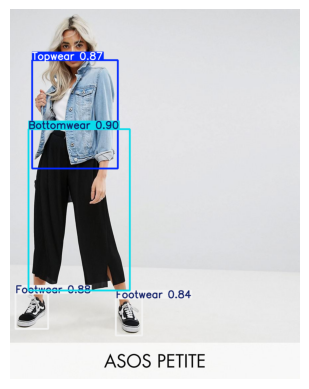

In [5]:

import os
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

# Path to the trained model
trained_model_path = 'best.pt'  # Update with your model path

# Initialize the YOLO model
model = YOLO(trained_model_path)

# Directory containing test images
test_images_dir = 'ecommerce_dataset/test/images'

# Specify the specific image file you want to infer
specific_image = 'dataset_pantalones_5247.png'  # Update with your specific image file name

# Function to infer and display results
def infer_and_display(image_path, save_path=None):
    results = model(image_path)  # Run inference
    result = results[0]  # Access the first item in the results list
    
    # Print verbose results
    print(result.verbose())
    
    # Show image with bounding boxes
    result.show()
    
    # Save annotated image if save_path is provided
    if save_path:
        result.save(save_path)
        print(f"Annotated image saved to: {save_path}")
        
        # Display the saved image using matplotlib
        img = cv2.imread(save_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.axis('off')  # Hide the axes
        plt.show()

# Infer and display results for the specified image
image_path = os.path.join(test_images_dir, specific_image)
save_path = 'annotated_image.png' 
infer_and_display(image_path, save_path)


In [7]:
import matplotlib.pyplot as plt
from ultralytics import YOLO
from PIL import Image
import numpy as np
import os


In [9]:
def generate_bbox(img_path, conf_thres=0.3):
    '''
    Generate bounding boxes for detected objects in the image using YOLO model.
    
    Args:
        img_path: Path to the image file.
        conf_thres: Confidence threshold for object detection.
        
    Returns:
        results: List of tuples containing (class, confidence score, (xmin, ymin, xmax, ymax)).
    '''
    results = model(img_path, conf=conf_thres)
    output = []
    for result in results[0].boxes:
        cls = result.cls.item()
        score = result.conf.item()
        bbox = result.xyxy[0].cpu().numpy().astype(int)
        class_name = model.names[int(cls)]
        output.append((class_name, score, bbox))
    return output

In [11]:
def extract_clothes(img_path: str): 
    '''
    Extract Topwear, Bottomwear, and Footwear from a given image.
    
    Args:
        img_path: Path to the image file.
        
    Returns:
        outputs: Dictionary containing detected object class as keys and the image slice as values. Also contains the original image.
    '''
    try:
        image = Image.open(img_path).convert('RGB')  # Ensure image is in RGB format
        image_np = np.array(image)
    except Exception as e:
        print(f"Error opening image: {e}")
        return {}

    results = generate_bbox(img_path, conf_thres=0.3)
    outputs = {"original_image": image_np}
    for result in results:
        class_name, score, bbox = result
        XMIN, YMIN, XMAX, YMAX = bbox
        print(f"Detected {class_name} with confidence {score} at [{XMIN}, {YMIN}, {XMAX}, {YMAX}]")
        
        # Ensure bounding box coordinates are within image bounds
        XMIN = max(0, XMIN)
        YMIN = max(0, YMIN)
        XMAX = min(image_np.shape[1], XMAX)
        YMAX = min(image_np.shape[0], YMAX)
        
        # Extract the region of interest
        extracted_image = image_np[YMIN:YMAX, XMIN:XMAX]
        
        # Store the extracted image based on class name
        outputs[class_name.lower()] = extracted_image
    
    return outputs

In [13]:
def plot_clothes(**images):
    '''
    Plot a dictionary of images in a row.
    
    Args:
        images: Dictionary containing image names and images in numpy.ndarray format.
    '''
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.axis("off")
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()


image 1/1 /Users/hanae/Desktop/Study/3. Third year/FinalProject/ecommerce_dataset/test/images/dataset_faldas_818.png: 640x512 1 Topwear, 1 Bottomwear, 2 Footwears, 93.3ms
Speed: 4.4ms preprocess, 93.3ms inference, 8.7ms postprocess per image at shape (1, 3, 640, 512)
Detected Bottomwear with confidence 0.8828758001327515 at [545, 422, 729, 671]
Detected Topwear with confidence 0.874140202999115 at [503, 216, 721, 461]
Detected Footwear with confidence 0.8475421667098999 at [700, 891, 786, 1073]
Detected Footwear with confidence 0.8375357985496521 at [576, 885, 649, 1066]


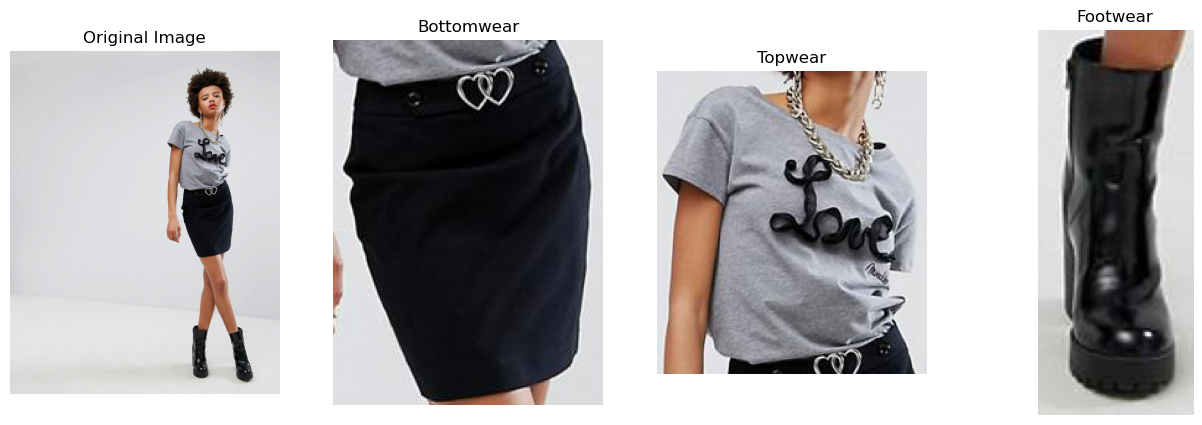

In [19]:
# Test on one image 

# Load the YOLO model
model = YOLO('best.pt')  # Update with trained model pat

# Path to the uploaded image
img_path = 'ecommerce_dataset/test/images/dataset_faldas_818.png'  # Update with the correct path if necessary

extracted_clothes = extract_clothes(img_path)
if extracted_clothes:
    plot_clothes(**extracted_clothes)


Processing image: ecommerce_dataset/test/images/dataset_camisetas_5566.png

image 1/1 /Users/hanae/Desktop/Study/3. Third year/FinalProject/ecommerce_dataset/test/images/dataset_camisetas_5566.png: 640x512 1 Topwear, 1 Bottomwear, 88.7ms
Speed: 3.7ms preprocess, 88.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 512)
Detected Topwear with confidence 0.9292188882827759 at [246, 289, 809, 1021]
Detected Bottomwear with confidence 0.7449303865432739 at [330, 951, 743, 1109]


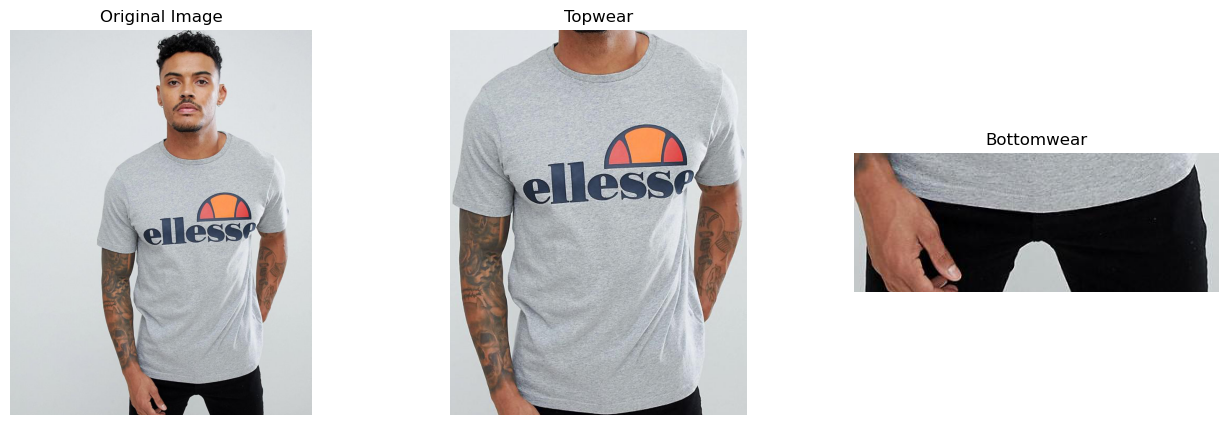

Processing image: ecommerce_dataset/test/images/dataset_botas_330.png

image 1/1 /Users/hanae/Desktop/Study/3. Third year/FinalProject/ecommerce_dataset/test/images/dataset_botas_330.png: 640x512 1 Bottomwear, 2 Footwears, 84.2ms
Speed: 1.9ms preprocess, 84.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 512)
Detected Bottomwear with confidence 0.9056840538978577 at [306, 0, 866, 540]
Detected Footwear with confidence 0.8696749210357666 at [538, 510, 777, 946]
Detected Footwear with confidence 0.857502818107605 at [52, 465, 539, 836]


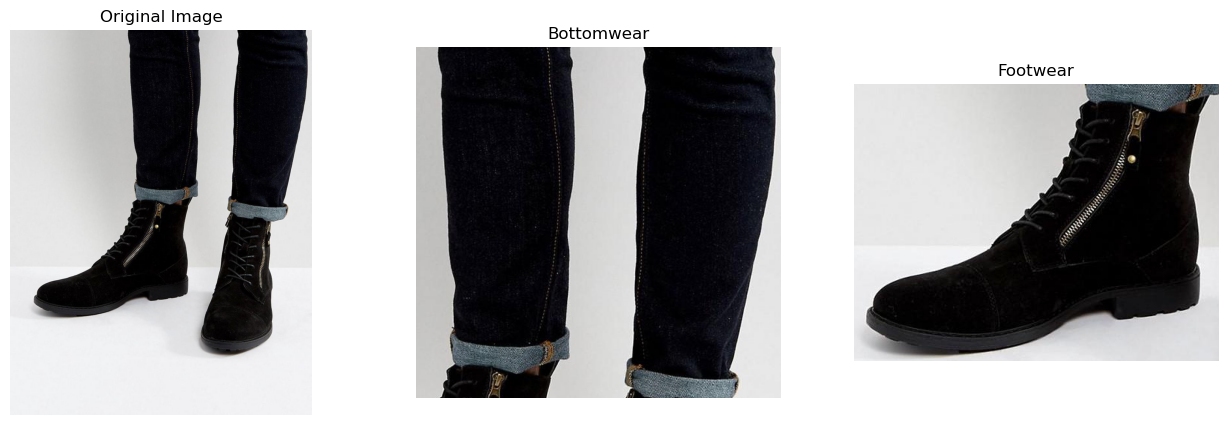

Processing image: ecommerce_dataset/test/images/dataset_abrigos_1598.png

image 1/1 /Users/hanae/Desktop/Study/3. Third year/FinalProject/ecommerce_dataset/test/images/dataset_abrigos_1598.png: 640x448 1 Topwear, 1 Bottomwear, 69.6ms
Speed: 1.5ms preprocess, 69.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 448)
Detected Bottomwear with confidence 0.8829073905944824 at [174, 748, 489, 900]
Detected Topwear with confidence 0.8644959330558777 at [76, 198, 588, 825]


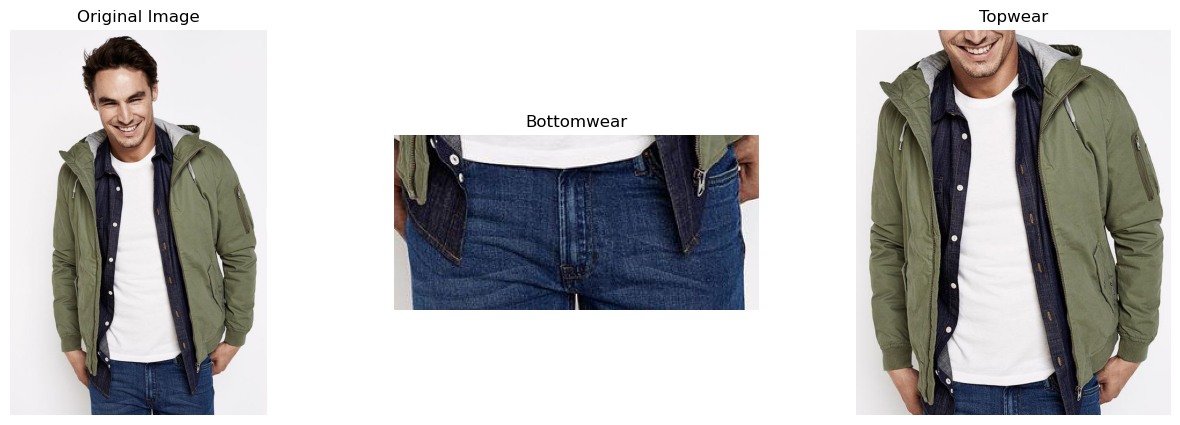

Processing image: ecommerce_dataset/test/images/dataset_abrigos_734.png

image 1/1 /Users/hanae/Desktop/Study/3. Third year/FinalProject/ecommerce_dataset/test/images/dataset_abrigos_734.png: 640x544 1 Topwear, 1 Bottomwear, 80.3ms
Speed: 1.4ms preprocess, 80.3ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 544)
Detected Topwear with confidence 0.9236295819282532 at [44, 105, 401, 538]
Detected Bottomwear with confidence 0.7286621332168579 at [117, 494, 357, 542]


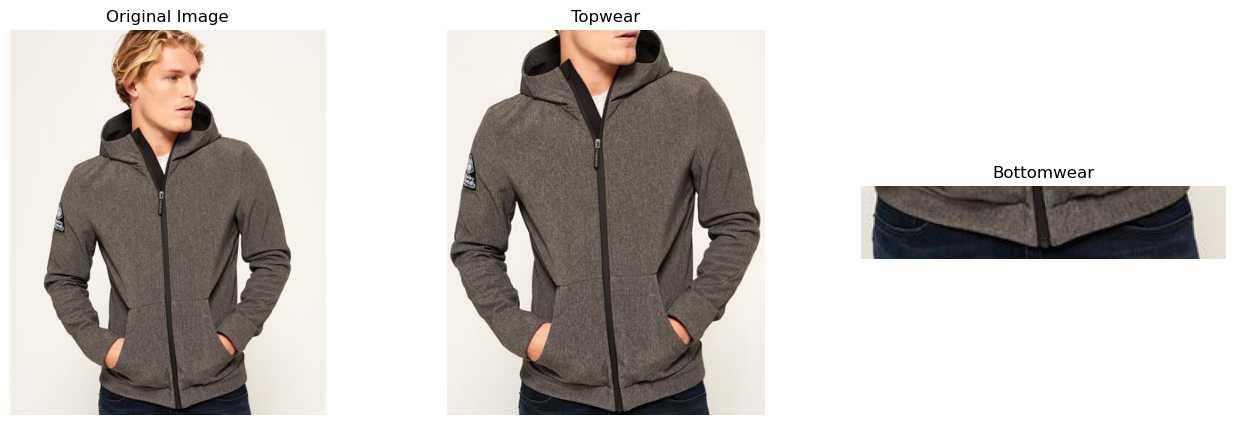

Processing image: ecommerce_dataset/test/images/dataset_camisas-y-blusas_2608.png

image 1/1 /Users/hanae/Desktop/Study/3. Third year/FinalProject/ecommerce_dataset/test/images/dataset_camisas-y-blusas_2608.png: 640x448 1 Topwear, 76.1ms
Speed: 1.4ms preprocess, 76.1ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 448)
Detected Topwear with confidence 0.9507279396057129 at [8, 21, 213, 312]


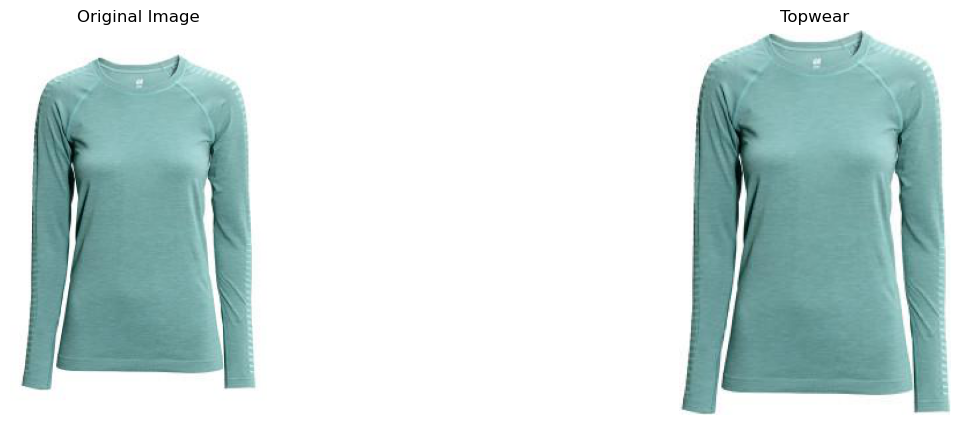

Processing image: ecommerce_dataset/test/images/dataset_camisas-y-blusas_1272.png

image 1/1 /Users/hanae/Desktop/Study/3. Third year/FinalProject/ecommerce_dataset/test/images/dataset_camisas-y-blusas_1272.png: 640x448 1 Topwear, 1 Bottomwear, 68.6ms
Speed: 1.9ms preprocess, 68.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 448)
Detected Topwear with confidence 0.8840426206588745 at [501, 556, 1384, 2354]
Detected Bottomwear with confidence 0.8309369683265686 at [522, 1849, 1192, 2528]


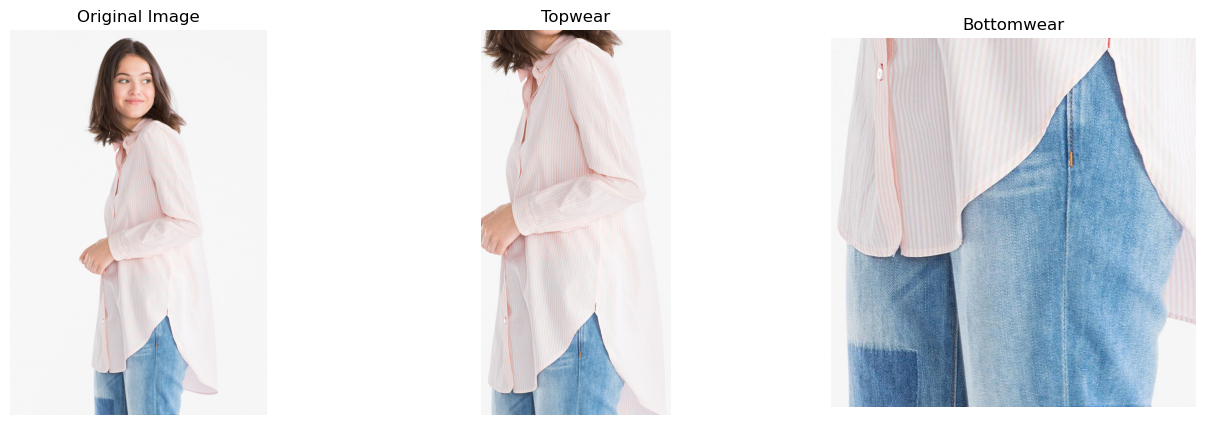

Processing image: ecommerce_dataset/test/images/dataset_faldas_468.png

image 1/1 /Users/hanae/Desktop/Study/3. Third year/FinalProject/ecommerce_dataset/test/images/dataset_faldas_468.png: 640x512 2 Topwears, 1 Bottomwear, 2 Footwears, 79.4ms
Speed: 1.9ms preprocess, 79.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 512)
Detected Footwear with confidence 0.8265267610549927 at [5, 943, 84, 1101]
Detected Footwear with confidence 0.81756991147995 at [222, 941, 298, 1104]
Detected Topwear with confidence 0.7443895936012268 at [35, 178, 460, 849]
Detected Topwear with confidence 0.667425274848938 at [136, 170, 335, 385]
Detected Bottomwear with confidence 0.5478836297988892 at [34, 346, 458, 854]


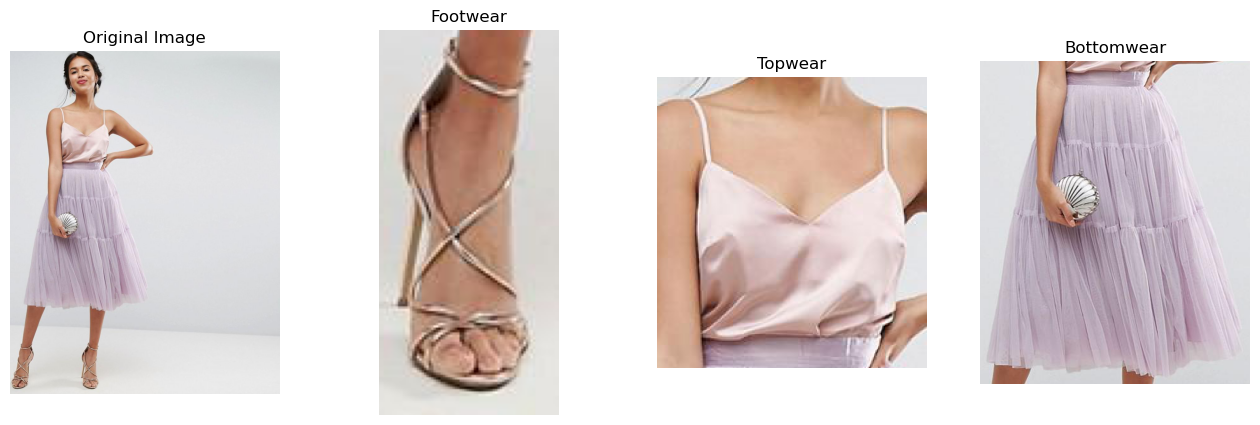

Processing image: ecommerce_dataset/test/images/dataset_camisetas_859.png

image 1/1 /Users/hanae/Desktop/Study/3. Third year/FinalProject/ecommerce_dataset/test/images/dataset_camisetas_859.png: 640x512 1 Topwear, 1 Bottomwear, 79.3ms
Speed: 2.0ms preprocess, 79.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 512)
Detected Topwear with confidence 0.8810288906097412 at [273, 275, 622, 966]
Detected Bottomwear with confidence 0.8339613676071167 at [293, 875, 607, 1110]


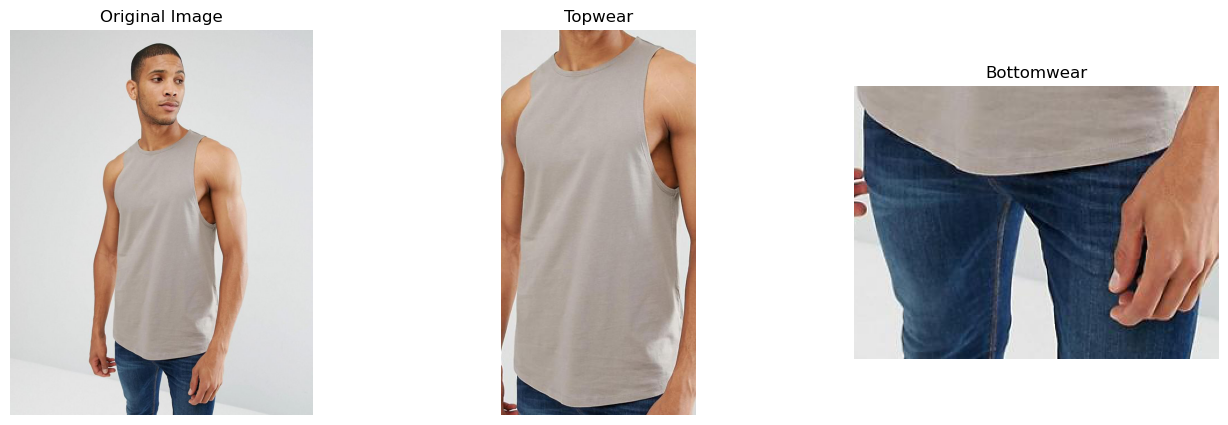

Processing image: ecommerce_dataset/test/images/dataset_faldas_1579.png

image 1/1 /Users/hanae/Desktop/Study/3. Third year/FinalProject/ecommerce_dataset/test/images/dataset_faldas_1579.png: 640x512 1 Topwear, 1 Bottomwear, 2 Footwears, 81.1ms
Speed: 3.1ms preprocess, 81.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 512)
Detected Bottomwear with confidence 0.9077046513557434 at [545, 347, 803, 641]
Detected Topwear with confidence 0.8435200452804565 at [501, 149, 788, 535]
Detected Footwear with confidence 0.8191236257553101 at [480, 891, 570, 1104]
Detected Footwear with confidence 0.7710531949996948 at [709, 890, 793, 1107]


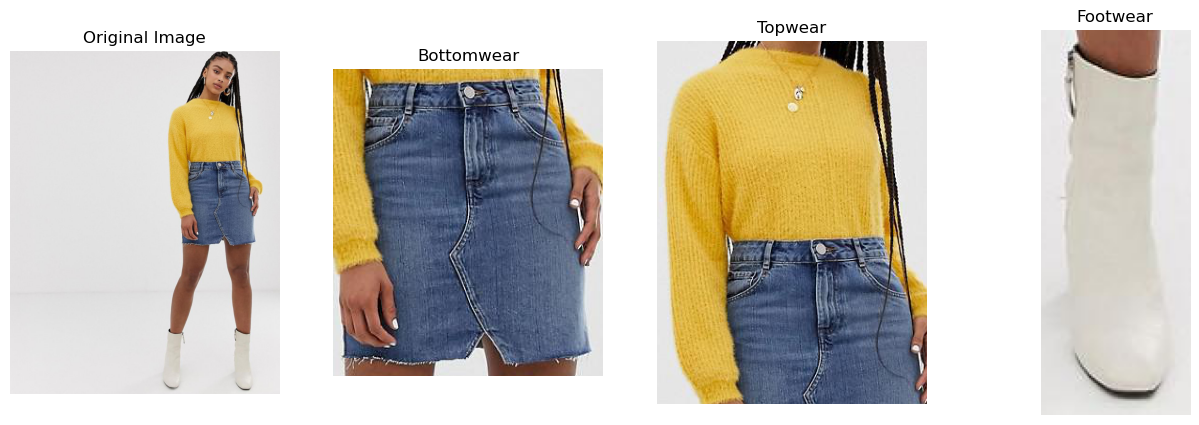

Processing image: ecommerce_dataset/test/images/dataset_jeans_430.png

image 1/1 /Users/hanae/Desktop/Study/3. Third year/FinalProject/ecommerce_dataset/test/images/dataset_jeans_430.png: 640x480 1 Bottomwear, 77.8ms
Speed: 2.7ms preprocess, 77.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 480)
Detected Bottomwear with confidence 0.9350999593734741 at [231, 9, 679, 1197]


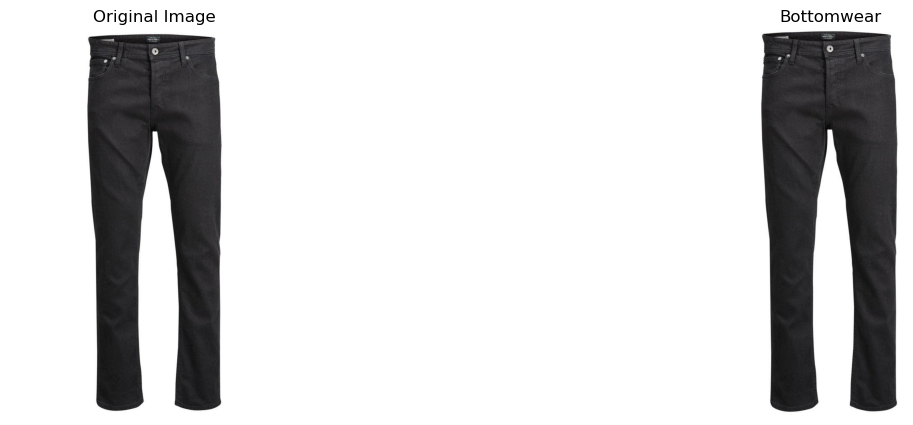

Processing image: ecommerce_dataset/test/images/dataset_jerseys_2353.png

image 1/1 /Users/hanae/Desktop/Study/3. Third year/FinalProject/ecommerce_dataset/test/images/dataset_jerseys_2353.png: 640x512 1 Topwear, 1 Bottomwear, 75.6ms
Speed: 1.9ms preprocess, 75.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 512)
Detected Topwear with confidence 0.862483561038971 at [103, 185, 624, 1023]
Detected Bottomwear with confidence 0.5357070565223694 at [234, 947, 655, 1109]


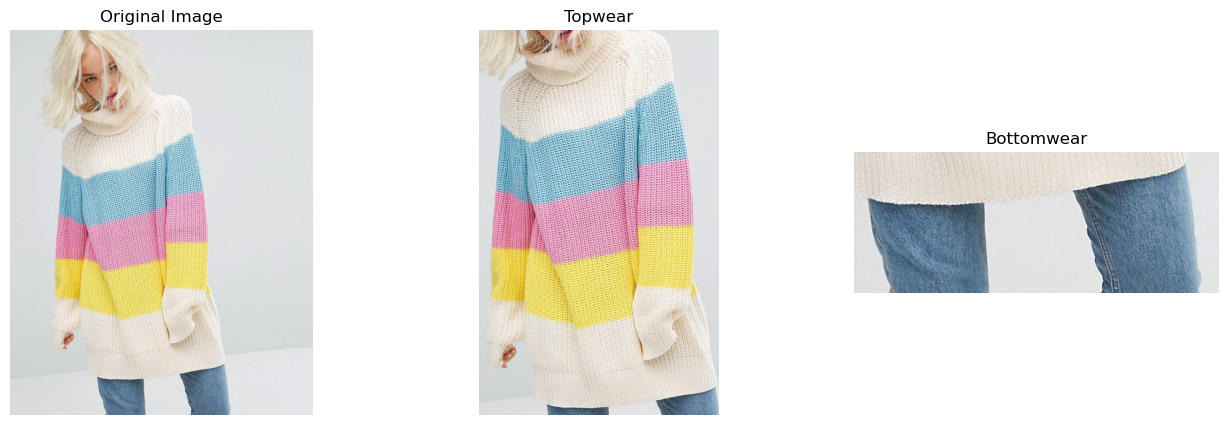

Processing image: ecommerce_dataset/test/images/dataset_pantalones_1715.png

image 1/1 /Users/hanae/Desktop/Study/3. Third year/FinalProject/ecommerce_dataset/test/images/dataset_pantalones_1715.png: 640x512 1 Topwear, 1 Bottomwear, 2 Footwears, 81.8ms
Speed: 2.7ms preprocess, 81.8ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 512)
Detected Bottomwear with confidence 0.9041624665260315 at [221, 179, 583, 907]
Detected Footwear with confidence 0.8773130178451538 at [411, 890, 597, 1110]
Detected Footwear with confidence 0.8600218296051025 at [248, 834, 406, 1037]
Detected Topwear with confidence 0.30741968750953674 at [144, 0, 641, 243]


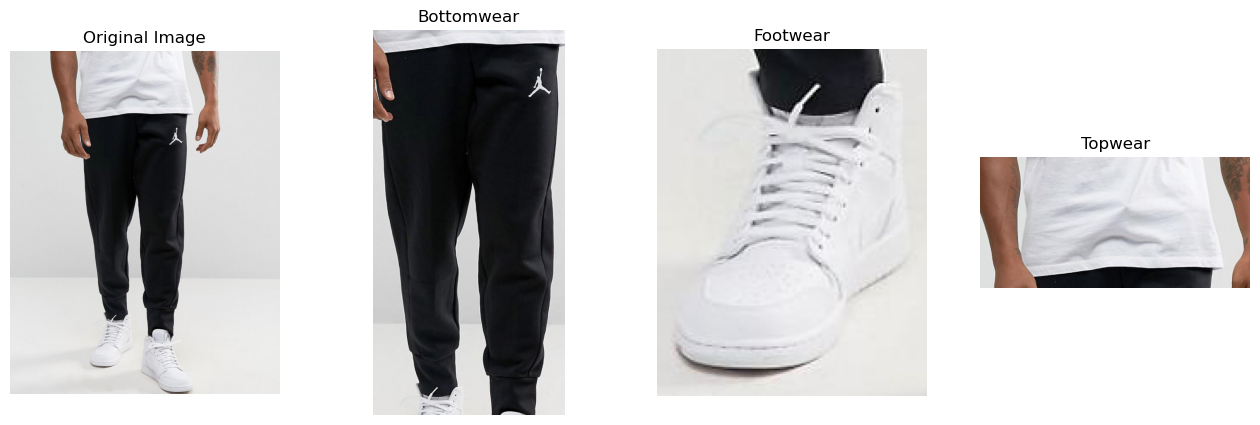

Processing image: ecommerce_dataset/test/images/dataset_planos_31.png

image 1/1 /Users/hanae/Desktop/Study/3. Third year/FinalProject/ecommerce_dataset/test/images/dataset_planos_31.png: 640x544 1 Footwear, 86.5ms
Speed: 1.8ms preprocess, 86.5ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 544)
Detected Footwear with confidence 0.9111847281455994 at [111, 336, 438, 553]


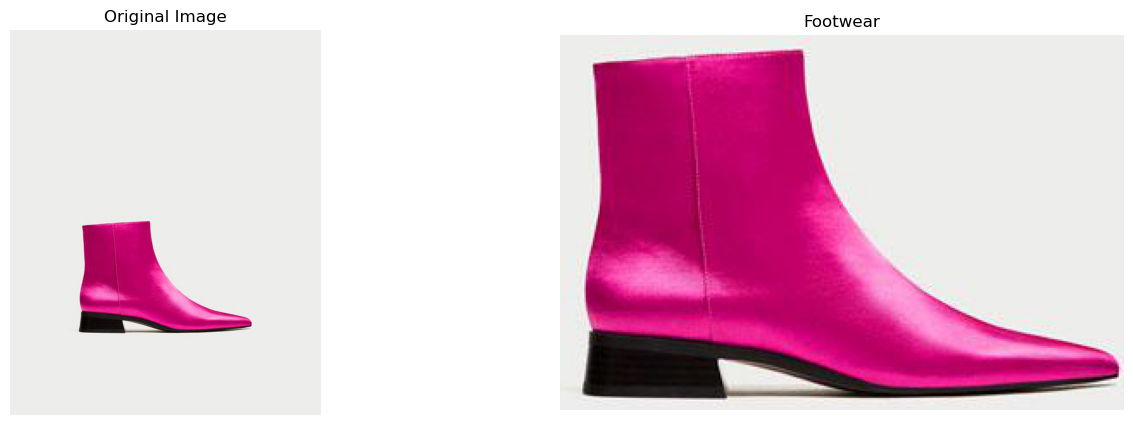

Processing image: ecommerce_dataset/test/images/dataset_zapatillas_2984.png

image 1/1 /Users/hanae/Desktop/Study/3. Third year/FinalProject/ecommerce_dataset/test/images/dataset_zapatillas_2984.png: 640x544 1 Footwear, 83.5ms
Speed: 2.3ms preprocess, 83.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)
Detected Footwear with confidence 0.8594003915786743 at [201, 991, 1364, 1445]


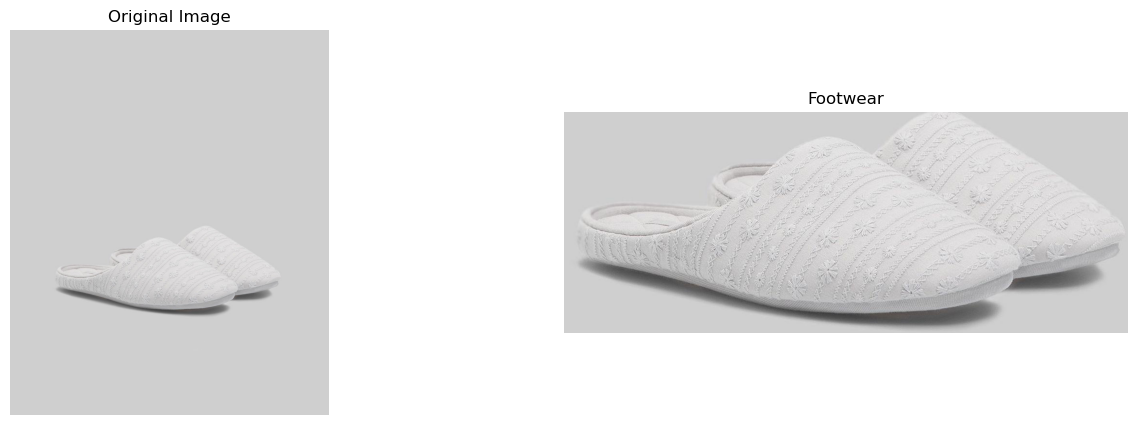

Processing image: ecommerce_dataset/test/images/dataset_camisas_2251.png

image 1/1 /Users/hanae/Desktop/Study/3. Third year/FinalProject/ecommerce_dataset/test/images/dataset_camisas_2251.png: 640x480 1 Topwear, 69.4ms
Speed: 1.7ms preprocess, 69.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)
Detected Topwear with confidence 0.9426750540733337 at [6, 58, 889, 1141]


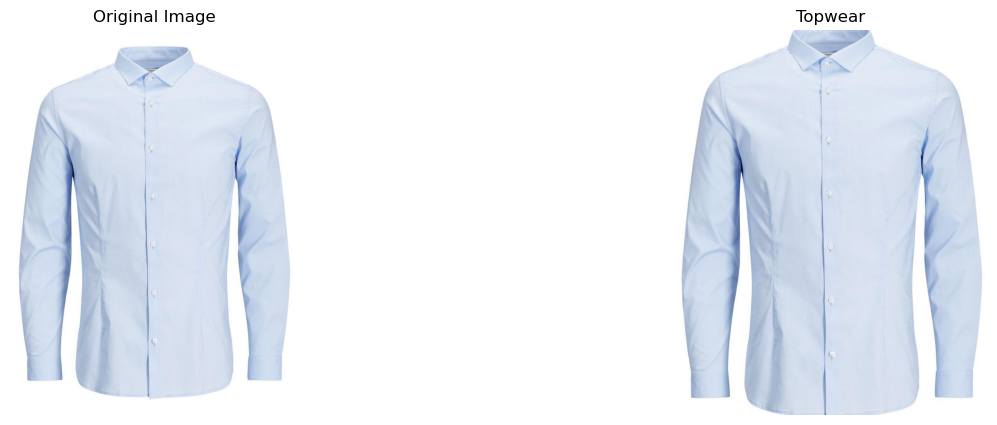

Processing image: ecommerce_dataset/test/images/dataset_jerseys_709.png

image 1/1 /Users/hanae/Desktop/Study/3. Third year/FinalProject/ecommerce_dataset/test/images/dataset_jerseys_709.png: 640x448 1 Topwear, 69.5ms
Speed: 1.1ms preprocess, 69.5ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 448)
Detected Topwear with confidence 0.9603611826896667 at [6, 35, 212, 298]


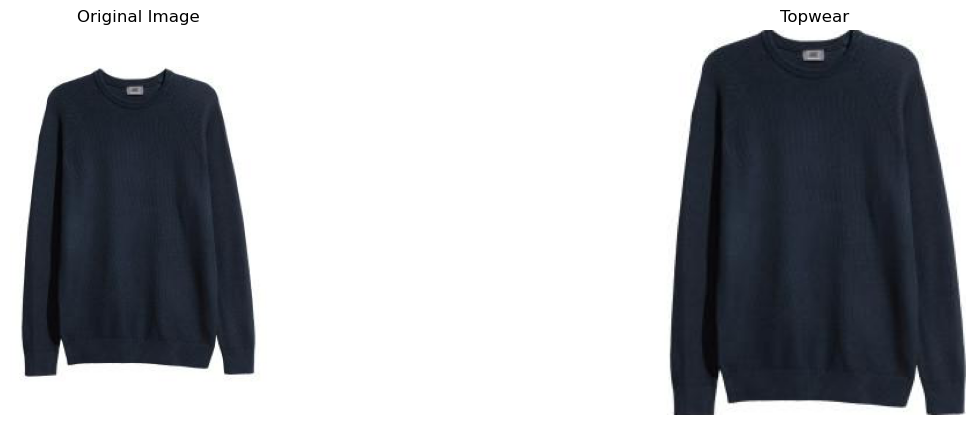

Processing image: ecommerce_dataset/test/images/dataset_abrigos_2819.png

image 1/1 /Users/hanae/Desktop/Study/3. Third year/FinalProject/ecommerce_dataset/test/images/dataset_abrigos_2819.png: 640x512 1 Topwear, 1 Bottomwear, 80.1ms
Speed: 1.9ms preprocess, 80.1ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 512)
Detected Bottomwear with confidence 0.9250170588493347 at [422, 760, 809, 1109]
Detected Topwear with confidence 0.9156666398048401 at [321, 201, 870, 825]


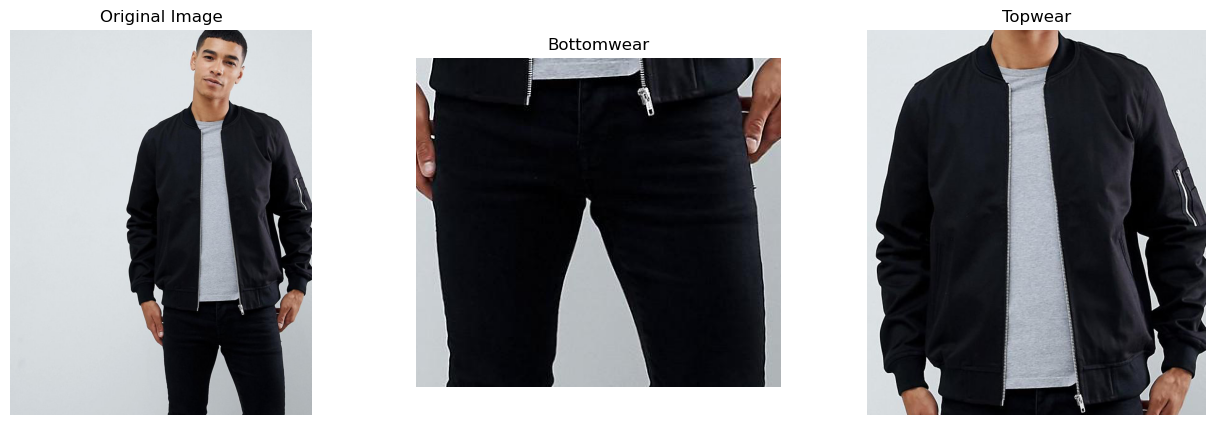

Processing image: ecommerce_dataset/test/images/dataset_abrigos_558.png

image 1/1 /Users/hanae/Desktop/Study/3. Third year/FinalProject/ecommerce_dataset/test/images/dataset_abrigos_558.png: 640x544 1 Topwear, 1 Bottomwear, 96.1ms
Speed: 1.8ms preprocess, 96.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 544)
Detected Topwear with confidence 0.9098525047302246 at [86, 88, 411, 524]
Detected Bottomwear with confidence 0.7979459762573242 at [148, 480, 374, 542]


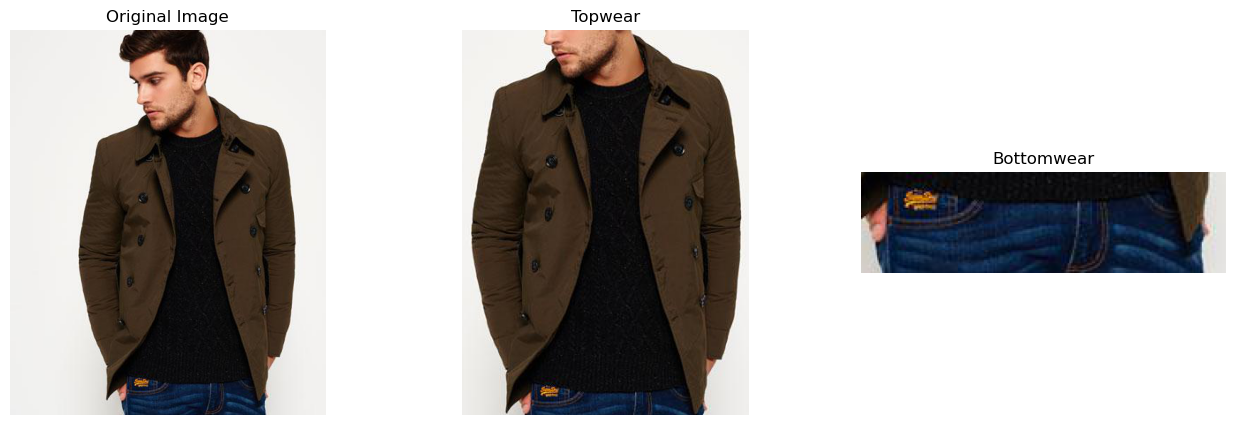

Processing image: ecommerce_dataset/test/images/dataset_trajes_226.png

image 1/1 /Users/hanae/Desktop/Study/3. Third year/FinalProject/ecommerce_dataset/test/images/dataset_trajes_226.png: 640x512 1 Topwear, 1 Bottomwear, 1 Footwear, 78.5ms
Speed: 1.9ms preprocess, 78.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 512)
Detected Bottomwear with confidence 0.8768759369850159 at [39, 400, 320, 901]
Detected Topwear with confidence 0.8703464269638062 at [17, 98, 396, 509]
Detected Footwear with confidence 0.7741636633872986 at [165, 865, 271, 1013]


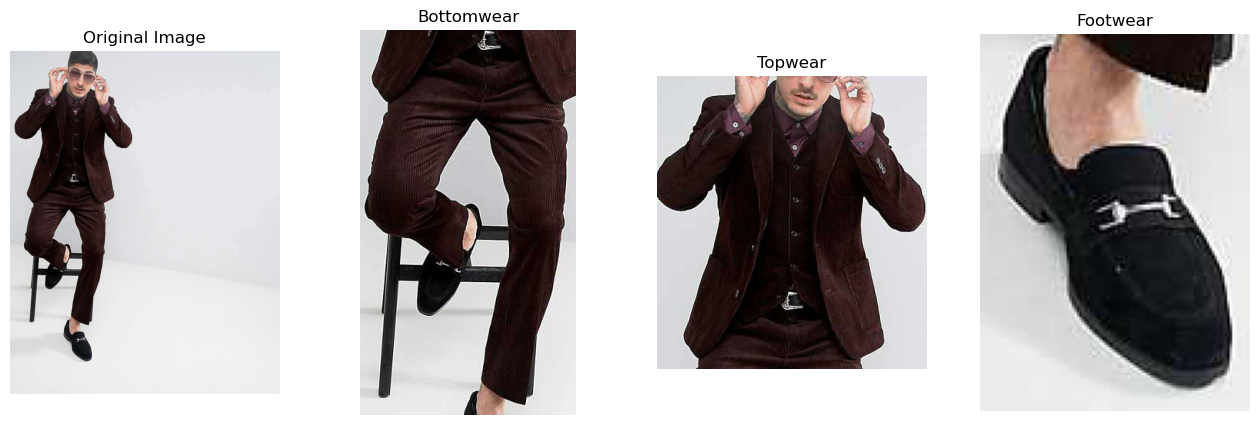

Processing image: ecommerce_dataset/test/images/dataset_abrigos_4019.png

image 1/1 /Users/hanae/Desktop/Study/3. Third year/FinalProject/ecommerce_dataset/test/images/dataset_abrigos_4019.png: 640x512 1 Topwear, 1 Bottomwear, 80.8ms
Speed: 2.3ms preprocess, 80.8ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 512)
Detected Topwear with confidence 0.9173867106437683 at [91, 242, 769, 1048]
Detected Bottomwear with confidence 0.8515533804893494 at [199, 959, 605, 1109]


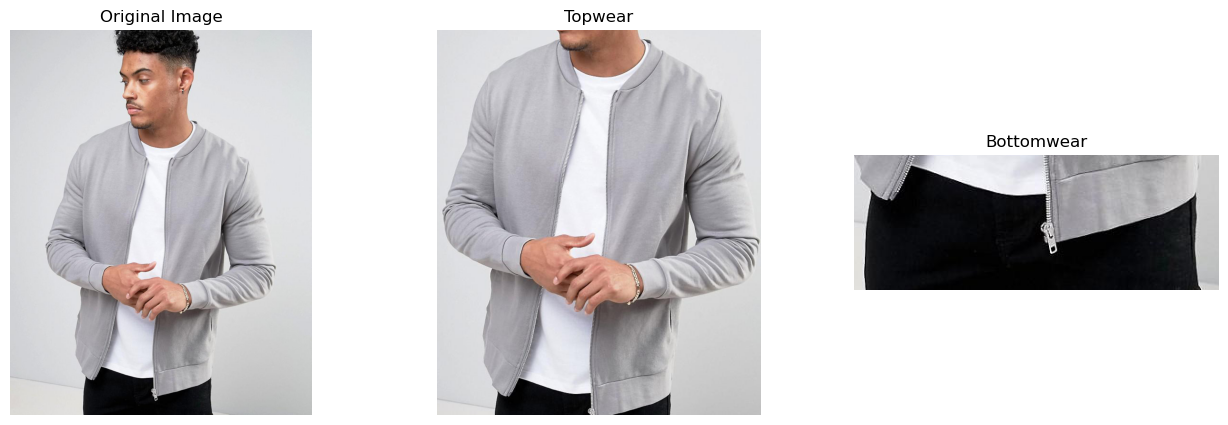

In [23]:
# 10 Random Images 
import os
import random

# Path to the uploaded image
img_dir = 'ecommerce_dataset/test/images'  

# Get list of all image files in the directory
image_files = [f for f in os.listdir(img_dir) if f.endswith('.png')]

# Select 10 random images
random_images = random.sample(image_files, 20)

# Process each random image
for img_file in random_images:
    img_path = os.path.join(img_dir, img_file)
    print(f"Processing image: {img_path}")
    
    # Extract clothes and plot results
    extracted_clothes = extract_clothes(img_path)
    if extracted_clothes:
        plot_clothes(**extracted_clothes)
